In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'minisom:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4903088%2F8260898%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T192206Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D15c09c8ab7227aaaf3ef217358ee158b2d6f560a8ad69c2a6c1ffed9d952ec741cd1e6b65bdc293d1417ecc4a91243273f4357b1aab5529d47098440248455651a31d877c59f02535cef12a8e8360a4364bd77c420f7ebd0ae06d3f499c2e2d20a72b7e1ec129a7136f982327c3fa8390ea3859e298721d413b6ee11be51434bea2a02466a0cd16857a301584f7cd31156d88b8c59151b3f90f94902f5d1f805220c266f67e06180373c72a6d0821ae28df8a2ea1db3eaca181355467075eebf6d15c9d407c799e43ffe9afbfaf1841d566d167709e810e3516fe858e53ae50e62d81f1cd1966d2096565aa4a255be5ac2adc18a8c9652c134e4ca50f11739fd,from-lectures:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4905633%2F8264256%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T192206Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D71ad08135a868c7b254ad86cd74714923a3b2442920d0df926a06ecd0142dad6fa9063c5c896aa37088a3693d5448a92678a31e75bfa34d583682982afebc3fb54ba5e0a6980e38e739dfd3ea43f760f99e81ba254ed81ce8d04ad0eb7c325a4faa139eb5e3826581f30bdbcb73d7c943e144eaac1bb470437b6a92a70fe68a6cf219b5f52e0cf8213e330f11ea38eebefc566f1b4404923ce1f5b154637420d9e2e1cdb14fdaf97af48047cdde8f28ac9b89cf1241f227ef4b5061c994e4d11a048da1bbc6e03946d7d07b1f87cd7df38df95812177bf39297349b6266f7cf95605e4f02aec702ca5329e625d4182a8b63b4e6c21baa31214c411a26ea4edb5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Importing the dataset
dataset=pd.read_csv('/kaggle/input/from-lectures/Credit_Card_Applications.csv')

In [ ]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
# Below, we don't make `y` to store result variables, its just to show, which customer got credit
# card approved and which didn't.
# Basically, there are no dependent variables in unsupervised learning and we are just going to use the
# X-Variable in the code.

X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)


In [ ]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [ ]:
import sys
sys.path.append('/kaggle/input/minisom/')

from minisom import MiniSom

In [ ]:
#x,y= depends on size of data set.
#input_len= no. of features in ('X'), we could have removed customer id, but we need it for customer
#identification.
#sigma is radius of different neighborhoods in the grid
#learning_rate=hyper-parameter that decides by how much the weights are updated duing each iteration,
#So the faster the convergence, lower will be the learning rate.
#decay func parameter= to improve the convergence., but we are going to use None and not use a decay.
#we dont need a random seed as well.
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)


In [ ]:
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

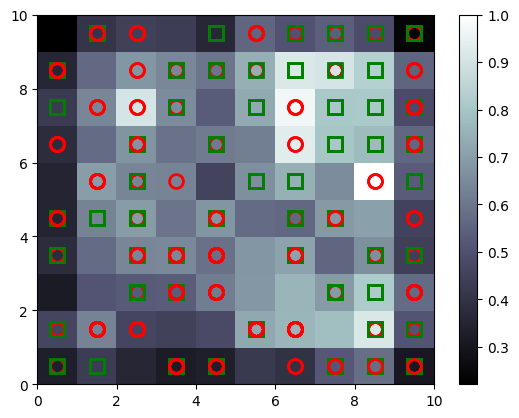

In [ ]:
#Visualizing the results
#Drawing mean inter-neuron distances to detect the outliers

from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar() #Range values of MID, mean interneuron distances
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
    w= som.winner(x)
    plot(w[0]+0.5,
        w[1]+0.5,
        markers[y[i]],
        markeredgecolor=colors[y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
show()
    #W[0],w[1] is at the bottom left, by adding.5 we got it to the centre
#Red circles- Customers who didn't get approval.
#Green circles- Customers who got approval.

In [ ]:
# remember frauds are detected by outlying winning nodes, that are far from the general rules
# White represents mean interneuron distances with large values, and therefore outliers, hence
# frauds.

In [ ]:
mappings=som.win_map(X)

In [ ]:
mappings[0,0]

[array([0.50624076, 1.        , 0.52631579, 0.94053571, 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.        , 0.        ]),
 array([0.44526266, 1.        , 0.89729323, 0.63392857, 0.5       ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.        , 0.        ])]

In [ ]:
#mapping stores a list of customers for given index(i,j)

In [ ]:
frauds = np.concatenate((mappings[(8,5)],mappings[(6,7)]),axis=0)

In [ ]:
frauds= sc.inverse_transform(frauds)
#frauds was normalized, so we denormalize it.

In [ ]:
customers= dataset.iloc[:,1:].values

In [ ]:
is_fraud=np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i]=1

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
customers= sc.fit_transform(customers)

from keras.models import Sequential
from keras.layers import Dense

classifier= Sequential()

classifier.add(Dense(units=2,kernel_initializer='uniform',activation='relu',input_dim=15))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

classifier.fit(customers,is_fraud,batch_size=1,epochs=2)

# y_pred=classifier.predict()


Epoch 1/2


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9789 - loss: 0.5855
Epoch 2/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9896 - loss: 0.1488


In [ ]:
y_pred=classifier.predict(customers)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
len(y_pred)

690

In [ ]:
#We want a 2-D array of 1st col:customer ids, 2nd col: predicted probabilities
#Since dataset is a 2-D array so to just take the 1st col. from it we use: (dataset.iloc[:,0:1])
y_pred= np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis=1)


In [ ]:
y_pred

array([[1.57761560e+07, 4.89961356e-02],
       [1.57395480e+07, 5.09028062e-02],
       [1.56628540e+07, 4.22351472e-02],
       ...,
       [1.56754500e+07, 3.96724455e-02],
       [1.57764940e+07, 3.02732345e-02],
       [1.55924120e+07, 4.03142571e-02]])

In [ ]:
#Sort customers by probabilites  of their cheating
#Trick to sort numpy array by 1 column:

y_pred= y_pred[y_pred[:,1].argsort()]

#This sorts the numpy array by column 1

In [ ]:
# y_pred = np.delete(y_pred, 0, axis=1)
y_pred

array([[1.57140870e+07, 1.71919633e-02],
       [1.57162760e+07, 1.86616927e-02],
       [1.56444460e+07, 1.87888611e-02],
       ...,
       [1.57627160e+07, 9.51164067e-02],
       [1.57365330e+07, 1.03252240e-01],
       [1.57901130e+07, 1.10111728e-01]])

In [ ]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.to_csv('y_pred.csv', index=False)

In [ ]:
y_pred_df

,0,1
0,15714087.0,0.017192
1,15716276.0,0.018662
2,15644446.0,0.018789
3,15731989.0,0.019000
4,15730793.0,0.019236
...,...,...
685,15593694.0,0.082015
686,15664615.0,0.084562
687,15762716.0,0.095116
688,15736533.0,0.103252
